In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
from pathlib import Path

In [3]:
pd.options.display.max_rows = 150
pd.options.display.float_format = "{:_.2f}".format

In [4]:
data_path = Path.cwd() / 'tiktok.csv'

In [5]:
df = pd.read_csv(data_path)

In [6]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
duration,6_746.00,194_428.74,59_208.59,43_426.00,155_866.00,186_980.00,224_284.00,716_206.00
popularity,6_746.00,57.65,24.62,0.00,44.00,64.00,76.00,100.00
danceability,6_746.00,0.74,0.14,0.15,0.66,0.76,0.84,0.99
energy,6_746.00,0.62,0.17,0.02,0.50,0.62,0.75,1.00
key,6_746.00,5.29,3.75,0.00,1.00,6.00,9.00,11.00
loudness,6_746.00,-7.01,2.85,-26.89,-8.53,-6.61,-5.02,1.08
mode,6_746.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00
speechiness,6_746.00,0.14,0.13,0.02,0.05,0.08,0.20,0.91
acousticness,6_746.00,0.22,0.24,0.00,0.03,0.13,0.32,0.99
instrumentalness,6_746.00,0.03,0.14,0.00,0.00,0.00,0.00,0.96


In [7]:
correlations = df.select_dtypes(include='number').corr()

<Axes: >

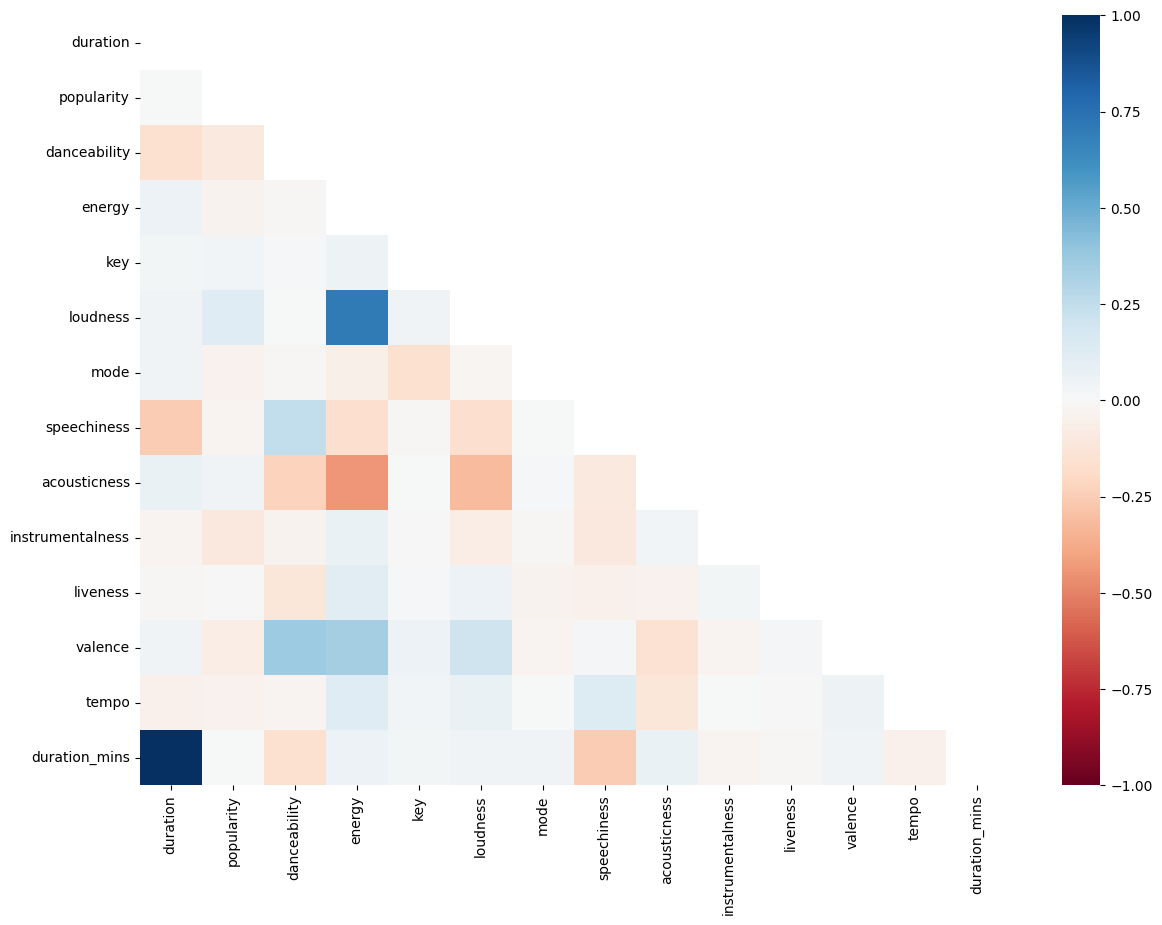

In [8]:
fig, ax = plt.subplots(figsize=(14,10))

mask = np.triu(np.ones_like(correlations)).astype(bool)

sns.heatmap(correlations, cmap='RdBu', vmin=-1.0, vmax=1.0, mask=mask, ax=ax)

In [ ]:
sns.pairplot(df.select_dtypes(include='number').drop(['mode', 'key'], axis=1))

In [ ]:
extra_cols = {
    'freq%': lambda _df: _df['freq'] / _df['count']
}

(df
 .select_dtypes(exclude='number')
 .describe()
 .T
 .assign(**extra_cols)
)